C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train\Covid


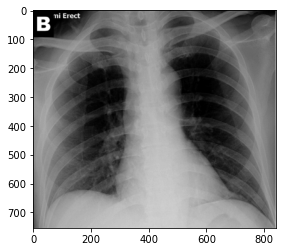

C:/Users/20115/Desktop/Covid_Phenomina_Dataset_train/train\Covid


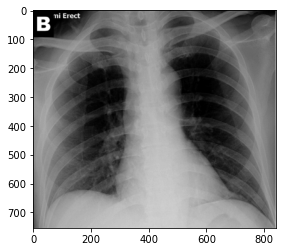

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg

DATADIR = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train"
DATADIR2 = "C:/Users/20115/Desktop/Covid_Phenomina_Dataset_train/train"
validation="C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation"
CATEGORIES = ["Covid","Normal","Phenomena"]

for cat in CATEGORIES:
    path = os.path.join(DATADIR,cat)
    print(path)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array ,cmap="gray")
        plt.show()
        break
    break
for cat2 in CATEGORIES:
    path = os.path.join(DATADIR2,cat)
    print(path)
    for img2 in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array ,cmap="gray")
        plt.show()
        break
    break

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg

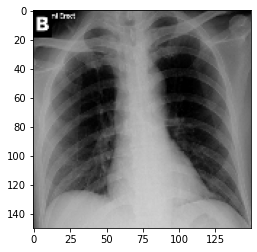

In [6]:
IMG_SIZE = 150

new_array = cv2.resize(img_array ,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array ,cmap="gray")

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 251/251 [00:01<00:00, 131.90it/s]

753


In [8]:
training_data2 = []

def create_training_data2():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR2,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data2.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data2()

print(len(training_data2))

100%|██████████| 318/318 [00:02<00:00, 128.38it/s]

954


In [6]:
validation_data = []

def create_validation_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(validation,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                validation_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_validation_data()

print(len(validation_data))

100%|██████████| 67/67 [00:00<00:00, 100.90it/s]

201


In [7]:

random.shuffle(training_data)
random.shuffle(training_data2)
random.shuffle(validation_data)

In [8]:
X_train = []
y_train= []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)



X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train=np.array(y_train)
print(y_train)
print(len(y_train))

[1 2 1 2 2 2 0 1 2 2 2 1 2 0 1 2 0 2 0 2 2 2 2 2 0 0 1 0 1 2 0 0 2 2 2 1 2
 1 1 0 1 2 2 2 0 1 1 0 2 0 1 2 1 0 0 1 0 1 1 2 1 2 2 0 2 2 2 2 0 2 2 0 0 1
 1 0 0 0 2 1 2 2 2 2 1 1 2 0 0 2 0 1 1 0 0 0 1 1 2 2 0 2 1 2 2 0 2 1 1 2 0
 2 1 0 1 2 0 2 2 0 1 2 1 2 2 0 0 0 0 0 2 1 0 0 0 0 0 0 0 2 1 0 1 1 1 2 2 0
 0 2 1 1 0 1 1 0 0 2 0 0 0 2 2 2 1 2 1 0 1 2 2 2 2 2 2 0 0 1 0 0 1 1 0 0 0
 0 1 1 2 0 2 0 2 1 1 0 2 1 2 1 2 2 0 2 1 1 2 1 1 1 2 1 0 0 2 0 2 2 0 1 1 0
 0 2 2 2 0 1 2 1 2 2 1 1 2 0 2 1 1 0 2 2 2 0 0 2 2 0 2 0 0 2 1 2 0 0 0 2 0
 1 0 1 2 2 0 2 1 0 2 1 1 0 0 0 1 0 0 2 2 0 1 2 1 0 2 2 1 0 0 0 0 1 2 1 2 0
 2 0 0 0 2 2 2 1 1 0 2 2 2 0 0 2 1 0 2 0 0 1 1 1 0 1 0 1 0 1 1 1 1 2 1 1 2
 0 2 2 0 0 2 0 1 2 2 0 2 2 0 1 2 1 2 2 1 2 1 2 2 0 1 0 0 2 1 2 1 1 2 0 1 0
 1 1 0 0 0 1 1 0 2 2 1 2 0 1 1 0 0 2 2 0 2 0 2 0 0 1 1 1 0 2 0 2 1 2 1 1 1
 2 1 1 0 2 1 0 1 0 0 1 1 1 0 0 2 0 0 2 2 1 2 2 1 0 2 0 1 1 0 1 1 2 2 0 1 1
 1 2 1 2 1 1 0 0 1 2 0 2 0 1 2 1 0 0 2 2 1 2 2 0 1 2 0 0 1 0 0 0 2 0 1 2 0
 1 1 2 2 1 0 2 2 2 2 0 0 

In [9]:
X_train2 = []
y_train2= []

for features,label in training_data2:
    X_train2.append(features)
    y_train2.append(label)



X_train2 = np.array(X_train2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train2=np.array(y_train2)
print(len(y_train2))

954


In [10]:
X_val = []
y_val= []

for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)



X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val =np.array(y_val)
print(y_val)
print(len(X_val))

[0 2 0 2 0 1 2 1 0 2 2 0 2 2 0 1 2 1 2 0 1 0 0 1 0 0 2 1 1 0 2 2 0 0 0 2 0
 1 0 1 2 0 2 0 2 0 2 0 2 0 1 0 0 2 0 1 0 2 0 0 2 0 1 1 0 1 0 1 2 0 2 0 0 2
 1 2 1 1 1 2 1 2 0 0 2 1 1 2 1 1 1 2 0 2 1 1 0 2 0 0 1 1 0 2 2 1 0 2 1 1 2
 0 0 1 0 0 2 2 2 1 1 2 0 1 1 1 0 1 2 2 1 1 2 1 1 2 0 2 2 0 1 1 2 0 1 2 1 0
 1 0 1 2 2 2 1 1 0 1 2 1 0 1 1 2 0 1 2 2 2 0 2 1 1 0 1 0 2 2 0 1 0 1 2 2 0
 1 2 2 0 1 0 2 2 1 0 0 1 2 2 0 1]
201


In [72]:
import pickle

pickle_out = open("X1.pickle","wb")
pickle.dump(X_train2, pickle_out)
pickle_out.close()

pickle_out = open("y1.pickle","wb")
pickle.dump(y_train2, pickle_out)
pickle_out.close()



In [73]:
import pickle

pickle_out = open("X2.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y2.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [74]:
import pickle

pickle_out = open("X3.pickle","wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("y3.pickle","wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()

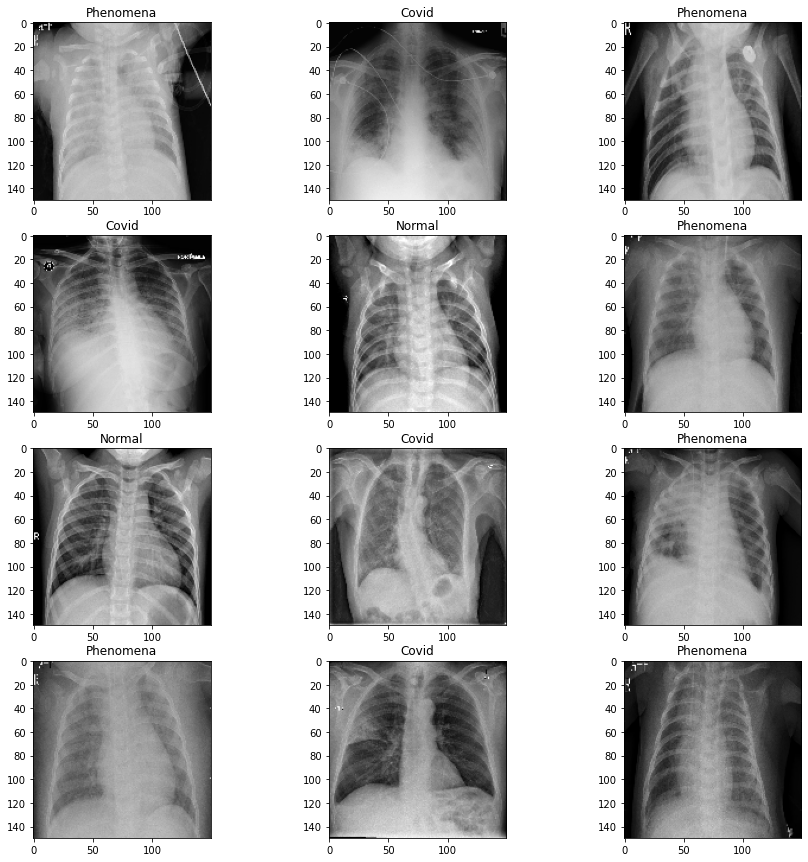

In [11]:
# # Display first 15 images of moles, and how they are classified
w=15
h=15
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3
X_val=X_val.squeeze()
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(columns, rows, i)
    if y_val[i] == 0:
        ax.title.set_text('Covid')
        plt.imshow(X_val[i], cmap="gray")
    elif y_val[i] == 1 :
        ax.title.set_text('Normal')
        plt.imshow(X_val[i], cmap="gray")
    else :
        ax.title.set_text('Phenomena')
        plt.imshow(X_val[i], cmap="gray")
    
plt.show()

In [4]:
TEST_DIR ="C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation/"
test_data = []
CATEGORIES = ["Covid", "Normal","Phenomena"]
def create_test_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(TEST_DIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_arr1=new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
                test_data.append([new_arr1, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))

100%|██████████| 67/67 [00:00<00:00, 104.04it/s]

0


In [5]:
X_test2 = []
X_test = []
y_test = []

for f,l in test_data:
    X_test.append(f)
    X_test2.append(f)
    y_test.append(l)


X_test2 = np.array(X_test2).reshape(-3, IMG_SIZE, IMG_SIZE, 3)
X_test2=X_test2.squeeze()
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test =np.array(y_test)
print(len(X_test))

X_test=X_test/255.0
X_test2=X_test.squeeze()

NameError: name 'IMG_SIZE' is not defined

In [11]:
X_train=[]
y_train=[]

for f,l in test_data:
    X_train.append(f)
    y_train.append(l)





X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train =np.array(y_train)


X_train=X_train/255.0

In [50]:
import pickle

pickle_out = open("Xtest.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("ytest.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [51]:
import random

random.shuffle(test_data)

In [12]:
print(len(X_test))
print(len(X_train))

201
201


In [17]:
tf.keras.models.load_model('Covid_Phenomena_1.model')

In [3]:

model = tf.keras.models.load_model('Covid_Phenomena_3.model')
i=0
prop_class=[]
mis_class=[]
classes = model.predict(X_test)


print(len(y_test))
for i in range(len(y_test)):
    if(np.argmax(classes[i]))==y_test[i]:
        prop_class.append(i)

i=0
for i in range(len(y_test)):
    if([np.argmax(classes[i])])!=y_test[i]:
        mis_class.append(i)
print(len(mis_class))
random.shuffle(prop_class)
random.shuffle(mis_class)
# # Display first 8 images of benign
w=60
h=40
fig=plt.figure(figsize=(15,25))
columns = 4
rows = 6

    
for i in range(len(mis_class)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ CATEGORIES[np.argmax(classes[mis_class[i]])]
                       +"\n"+"Actual result: "+ CATEGORIES[y_test[mis_class[i]]] , fontdict={'color': 'red', 'fontweight': 'medium'})
    ax.Color = 'red';
    ax.imshow(X_test2[mis_class[i]], cmap="gray")
    

NameError: name 'X_test' is not defined

In [68]:
print(len(classes))

201


C:\Users\20115\Anaconda3\envs\Covidgp\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


IndexError: list index out of range

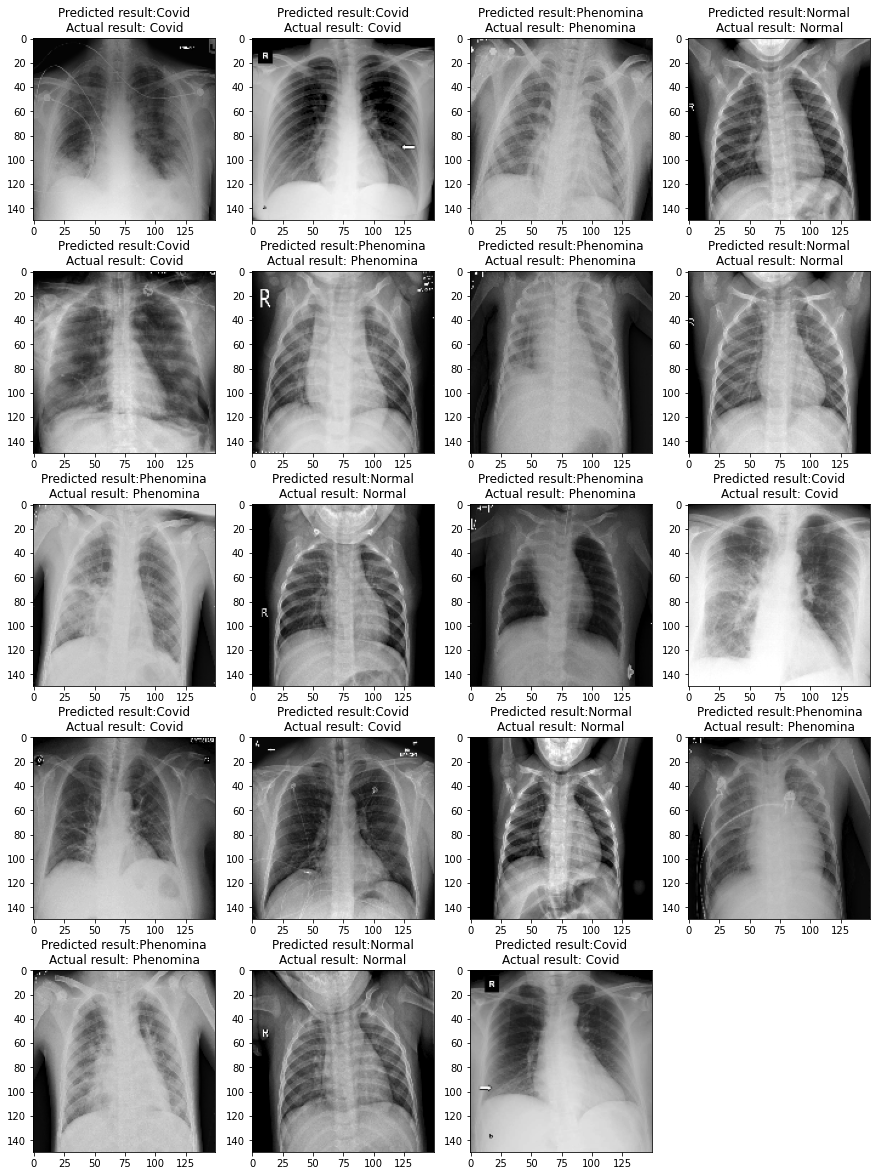

In [69]:
w=60
h=40
fig=plt.figure(figsize=(15,25))
columns = 4
rows = 6 
for i in range(0,19):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ CATEGORIES[np.argmax(classes[prop_class[i]])]
                       +"\n"+"Actual result: "+ CATEGORIES[y_test[prop_class[i]]] )
    ax.Color = 'red';
    ax.imshow(X_Test2[prop_class[i]], cmap="gray")
    
for y in range(4):
    ax1 = fig.add_subplot(rows, columns, y+i)
    ax1.set_title("Predicted result:"+ CATEGORIES[np.argmax(classes[mis_class[y]])]
                       +"\n"+"Actual result: "+ CATEGORIES[y_test[mis_class[y]]] , fontdict={'color': 'red', 'fontweight': 'medium'})
    ax1.Color = 'red';
    ax1.imshow(X_Test2[mis_class[y]], cmap="gray")
plt.show()


Confusion matrix, without normalization
[[67  0  0]
 [ 0 67  0]
 [ 0  0 67]]
Classification Report
1.0
              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        67
      Normal       1.00      1.00      1.00        67
   Phenomena       1.00      1.00      1.00        67

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



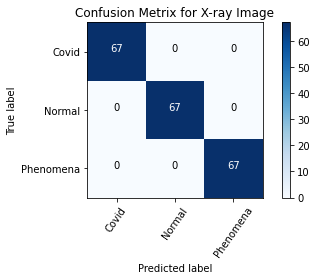

In [70]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(classes, axis=1), y_test)

cm_plot_label =['Covid', 'Normal',"Phenomena"]
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for X-ray Image')

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print('Classification Report')
accuracy_score(np.argmax(classes, axis=1), y_test)
print(accuracy_score(np.argmax(classes, axis=1), y_test))
target_names = ['Covid', 'Normal',"Phenomena"]
 
report = classification_report(y_test, np.argmax(classes, axis=1), target_names=target_names)
print(report) 

In [1]:

from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
CATEGORIES = ["Covid", "Normal","Phenomina"]
y_prob = model.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))




NameError: name 'model' is not defined

C:\Users\20115\Anaconda3\envs\Covidgp\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


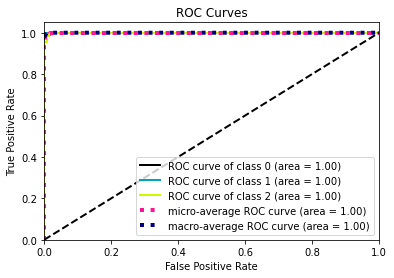

In [60]:
import scikitplot as skplt

y_prob = model.predict_proba(X_test)
y_true = y_test

skplt.metrics.plot_roc_curve(y_test, y_prob)
plt.show()

In [63]:
model.fit(X_train, to_categorical(y_train), epochs=5, batch_size=100, verbose=1)


Train on 201 samples
Epoch 1/5
201/201 [==============================] - 21s 102ms/sample - loss: 0.0928 - accuracy: 0.9751
Epoch 2/5
201/201 [==============================] - 29s 146ms/sample - loss: 0.0390 - accuracy: 0.9801
Epoch 3/5
201/201 [==============================] - 49s 242ms/sample - loss: 0.1019 - accuracy: 0.9701
Epoch 4/5
201/201 [==============================] - 35s 176ms/sample - loss: 0.0568 - accuracy: 0.9950
Epoch 5/5
201/201 [==============================] - 38s 189ms/sample - loss: 0.0093 - accuracy: 0.9950


In [7]:
skplt.metrics.plot_precision_recall(y_test, y_prob)

plt.show()

NameError: name 'skplt' is not defined

In [6]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np

model = ResNet50(weights='imagenet')
plot_model(model, to_file='model.png')


Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
